<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_FinalProject/blob/main/Crop_Yield_prediction_regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.5f}'.format)

In [38]:
# Loading the dataset
file_url= 'https://raw.githubusercontent.com/ManjuVijayakumar/ICTAK_DSA_FinalProject/refs/heads/main/crop_yield_main.csv'
yield_df = pd.read_csv(file_url, index_col= 'Unnamed: 0')

# First 5 rows
yield_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
0,Arecanut,1997,Whole Year,Assam,73814.00000,56708,2372.20000,7024878.38000,22882.34000,0.79609,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
1,Arhar/Tur,1997,Kharif,Assam,6637.00000,4685,2372.20000,631643.29000,2057.47000,0.71043,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
2,Castor seed,1997,Kharif,Assam,796.00000,22,2372.20000,75755.32000,246.76000,0.23833,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
3,Coconut,1997,Whole Year,Assam,19656.00000,126905000,2372.20000,1870661.52000,6093.36000,5238.05174,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
4,Cotton(lint),1997,Kharif,Assam,1739.00000,794,2372.20000,165500.63000,539.09000,0.42091,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000


In [39]:
# Last 5 rows
yield_df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
28636,Small millets,1998,Kharif,Nagaland,4000.00000,2000,2225.40000,395200.00000,1160.00000,0.50000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
28637,Wheat,1998,Rabi,Nagaland,1000.00000,3000,2225.40000,98800.00000,290.00000,3.00000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
28638,Maize,1997,Kharif,Jammu and Kashmir,310883.00000,440900,1295.90000,29586735.11000,96373.73000,1.28500,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
28639,Rice,1997,Kharif,Jammu and Kashmir,275746.00000,5488,1295.90000,26242746.82000,85481.26000,0.01667,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
28640,Wheat,1997,Rabi,Jammu and Kashmir,239344.00000,392160,1295.90000,22778368.48000,74196.64000,1.26182,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000


## **Exploratory Data Analysis**

In [40]:
# Basic info
print('Dataset has {} rows and {} columns.'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 28641 rows and 45 columns.


In [41]:
# Column names
yield_df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type', 'Annual_mean_temp', 'Apr_temp', 'Aug_temp', 'Dec_temp',
       'Feb_temp', 'Jan_temp', 'Jul_temp', 'Jun_temp', 'Mar_temp', 'May_temp',
       'Monsoon_temp', 'Nov_temp', 'Oct_temp', 'Post_Monsoon_temp', 'Sep_temp',
       'Summer_temp', 'Winter_temp', 'JAN_rain', 'FEB_rain', 'MAR_rain',
       'APR_rain', 'MAY_rain', 'JUN_rain', 'JUL_rain', 'AUG_rain', 'SEP_rain',
       'OCT_rain', 'NOV_rain', 'DEC_rain', 'Jan-Feb_rain', 'Mar-May_rain',
       'Jun-Sep_rain', 'Oct-Dec_rain'],
      dtype='object')

In [42]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28641 entries, 0 to 28640
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               28641 non-null  object 
 1   Crop_Year          28641 non-null  int64  
 2   Season             28641 non-null  object 
 3   State              28641 non-null  object 
 4   Area               28641 non-null  float64
 5   Production         28641 non-null  int64  
 6   Annual_Rainfall    28641 non-null  float64
 7   Fertilizer         28641 non-null  float64
 8   Pesticide          28641 non-null  float64
 9   Yield              28641 non-null  float64
 10  Country            28641 non-null  object 
 11  Soil_type          28641 non-null  object 
 12  Annual_mean_temp   27613 non-null  float64
 13  Apr_temp           27613 non-null  float64
 14  Aug_temp           27613 non-null  float64
 15  Dec_temp           27613 non-null  float64
 16  Feb_temp           27613 no

In [68]:
# Summary Statistics
pd.options.display.float_format = '{:2f}'.format
yield_df.describe(include= ['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,25033.000000,2007.701993,5.937147,1997.000000,2003.000000,2008.000000,2013.000000,2017.000000
Area,25033.000000,257488.469365,870010.892227,0.500000,3342.000000,21900.000000,149600.000000,50808100.000000
Production,25033.000000,17255004.592578,248948518.173114,0.000000,3212.000000,28603.000000,226399.000000,6326000000.000000
Annual_Rainfall,25033.000000,1449.215931,878.907790,274.700000,791.100000,1120.500000,1922.400000,4229.400000
Fertilizer,25033.000000,33607973.312541,109426075.838862,54.170000,434379.360000,2888173.900000,18729564.000000,4835406877.000000
Pesticide,25033.000000,67371.345092,247563.299566,0.105000,837.690000,5536.860000,37509.450000,15750511.000000
Yield,25033.000000,76.085275,841.551763,0.000000,0.560000,0.999444,2.214545,14794.630000
Annual_mean_temp,25033.000000,25.050258,3.940732,3.830000,25.490000,26.180000,26.930000,28.430000
Apr_temp,25033.000000,28.405464,4.945334,2.820000,28.760000,30.070000,31.080000,33.020000
Aug_temp,25033.000000,26.605050,2.881162,10.420000,25.580000,27.030000,28.420000,31.290000


In [69]:
yield_df.describe(include= 'object').T

,count,unique,top,freq
Crop,25033,55,Rice,1448
Season,25033,6,Kharif,10298
State,25033,27,Karnataka,3820
Country,25033,1,India,25033
Soil_type,25033,6,black,9577


Rice is the most frequenctly occurring crop <br>
6 unique seasons. Kharif the most common season

Missing value analysis

<Axes: >

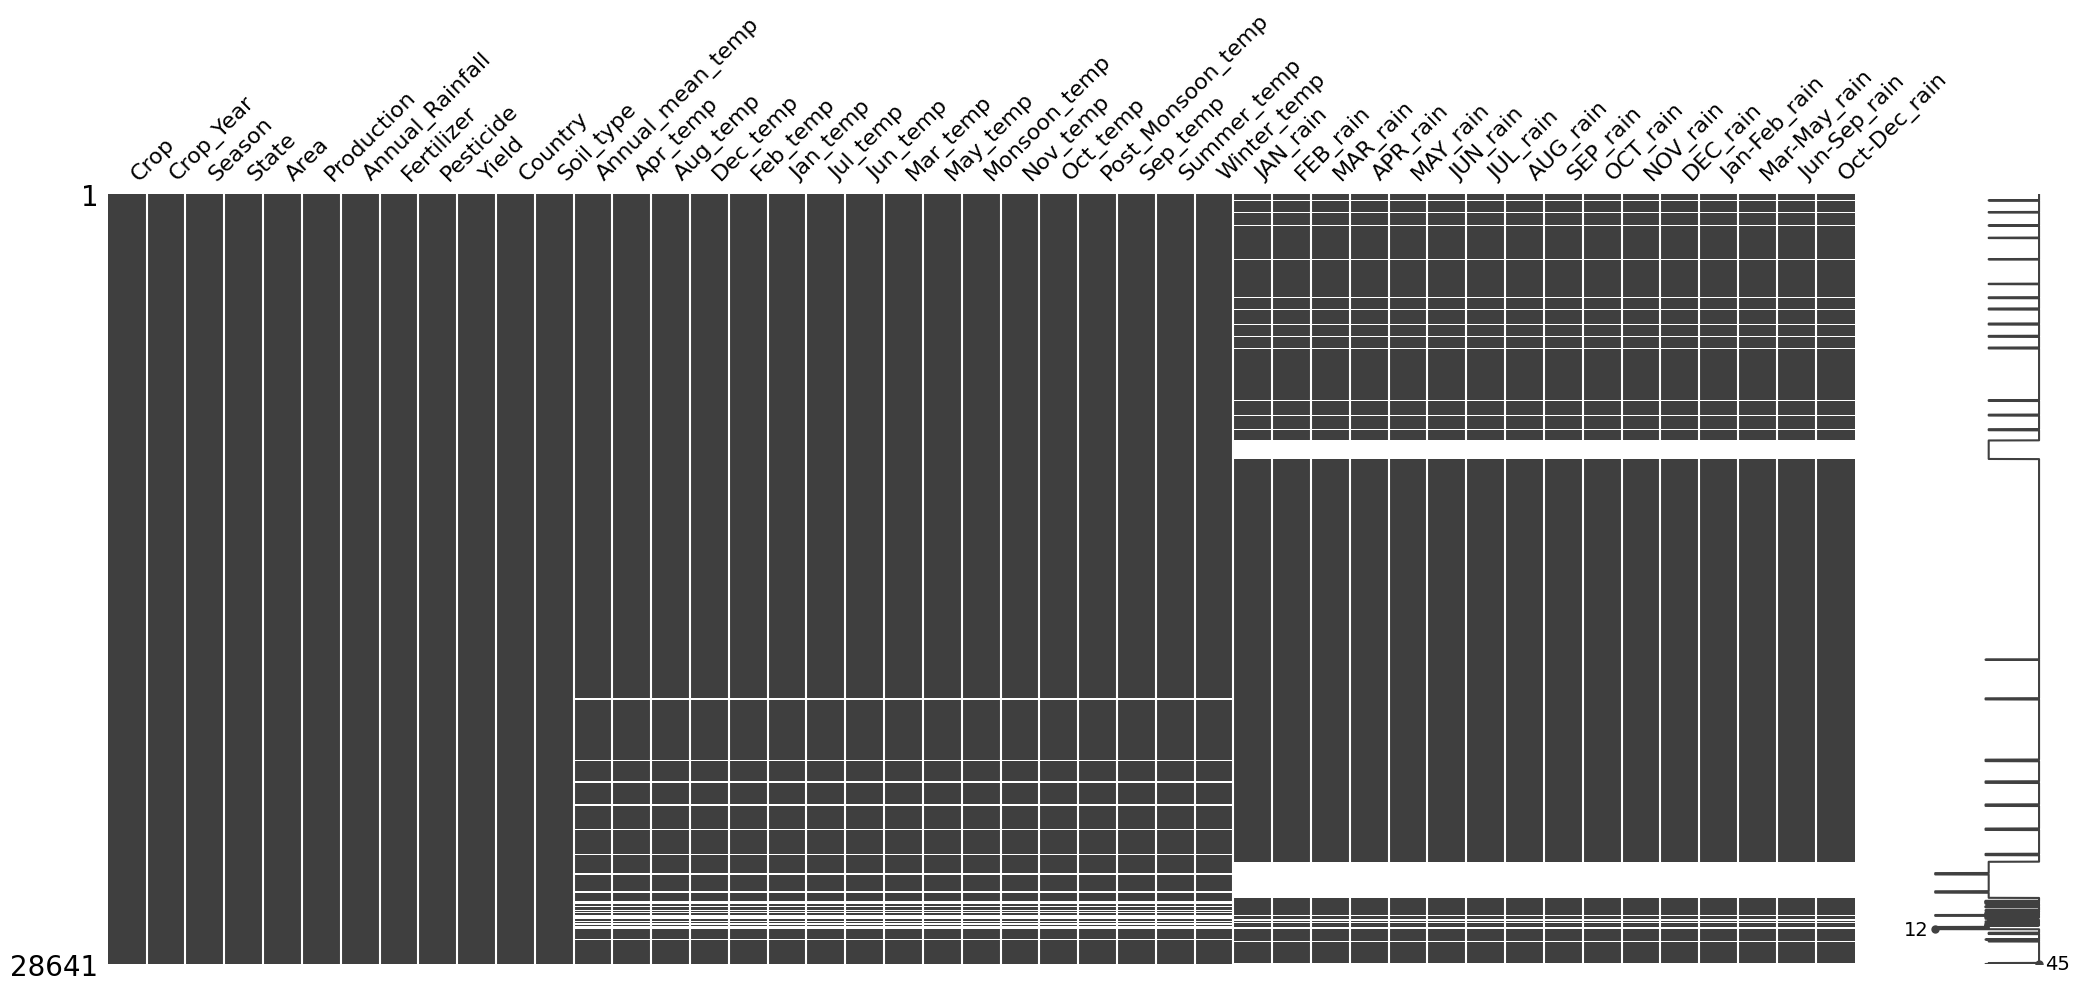

In [44]:
import missingno

missingno.matrix(yield_df)

In [45]:
# Calculate percentage of missing values per columns
missing_percent= (yield_df.isnull().sum() / len(yield_df)) * 100

# Combine with Counts
missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

                   Missing Values  Percentage (%)
APR_rain                     2802         9.78318
MAY_rain                     2802         9.78318
JUN_rain                     2802         9.78318
JUL_rain                     2802         9.78318
AUG_rain                     2802         9.78318
SEP_rain                     2802         9.78318
OCT_rain                     2802         9.78318
NOV_rain                     2802         9.78318
DEC_rain                     2802         9.78318
Jan-Feb_rain                 2802         9.78318
Mar-May_rain                 2802         9.78318
Jun-Sep_rain                 2802         9.78318
Oct-Dec_rain                 2802         9.78318
FEB_rain                     2802         9.78318
MAR_rain                     2802         9.78318
JAN_rain                     2802         9.78318
Winter_temp                  1028         3.58926
Oct_temp                     1028         3.58926
Summer_temp                  1028         3.58926


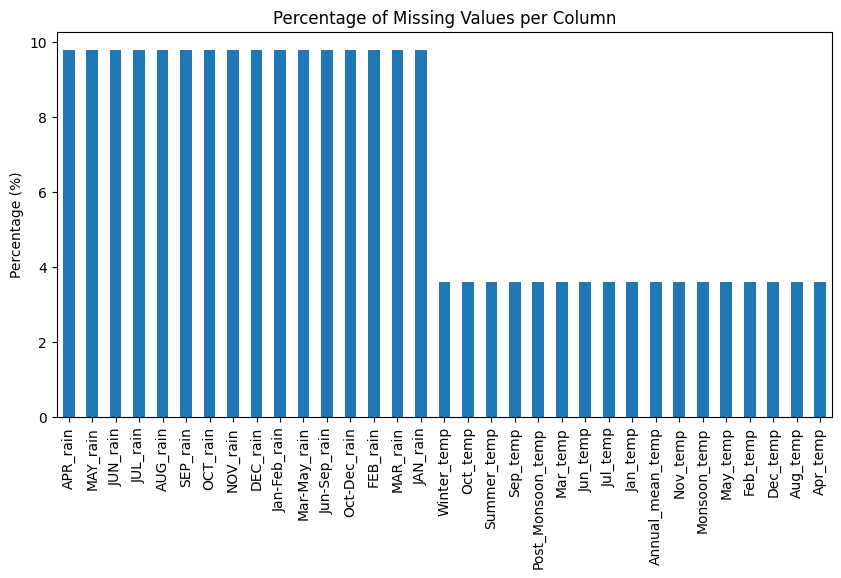

In [46]:
missing_data['Percentage (%)'].plot(kind='bar', figsize=(10,5))
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percentage (%)')
plt.show()

In [47]:
yield_df.Crop_Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [48]:
yield_df.State.value_counts()

,count
State,
Karnataka,3956
Maharashtra,2852
Andhra Pradesh,2394
West Bengal,2094
Madhya Pradesh,1583
Uttar Pradesh,1568
Gujarat,1554
Chhattisgarh,915
Bihar,896


In [49]:
# 631+397
# Temperature detail of Telangana and JK missing from the dataset. Statistical imputation would make little sense

yield_df= yield_df.query("State not in ['Jammu and Kashmir', 'Telangana']")

missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

              Missing Values  Percentage (%)
APR_rain                2580         9.78318
MAY_rain                2580         9.78318
JUN_rain                2580         9.78318
JUL_rain                2580         9.78318
AUG_rain                2580         9.78318
SEP_rain                2580         9.78318
OCT_rain                2580         9.78318
NOV_rain                2580         9.78318
DEC_rain                2580         9.78318
Jan-Feb_rain            2580         9.78318
Mar-May_rain            2580         9.78318
Jun-Sep_rain            2580         9.78318
Oct-Dec_rain            2580         9.78318
FEB_rain                2580         9.78318
MAR_rain                2580         9.78318
JAN_rain                2580         9.78318


In [50]:
# Analysing null values in Rain features

rain_cols = ['JAN_rain', 'FEB_rain', 'MAR_rain','APR_rain', 'MAY_rain', 'JUN_rain',
             'JUL_rain', 'AUG_rain', 'SEP_rain','OCT_rain', 'NOV_rain', 'DEC_rain',
             'Jan-Feb_rain', 'Mar-May_rain','Jun-Sep_rain', 'Oct-Dec_rain']


all_null_rain = yield_df[rain_cols].isnull().all(axis= 1).sum()
print('No of rows with no rainfall details available:', all_null_rain)

No of rows with no rainfall details available: 2580


In [51]:
# yield_df.to_csv('working_file.csv')

In [52]:
null_by_year = (
            yield_df.groupby('Crop_Year')[rain_cols]
            .apply(lambda x: x.isnull().all().all())  # True if *all* rain cols null for the entire year
              )

# Filter years where condition is True
years_with_all_null_rain = null_by_year[null_by_year].index.tolist()

years_with_all_null_rain

[2018, 2019, 2020]

In [53]:
# Rainfall data for the year 2018, 2019 and 2020 are not available for any of the States. Since imputing for entire year values would be less sensible
# dropping rows have all rainfall details as NaN

yield_df= yield_df.dropna(subset= rain_cols, how= 'all')

missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [35]:
# yield_df.to_csv('working_file.csv')

In [55]:
yield_df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
19692,Wheat,2011,Rabi,West Bengal,315659.00000,872895,1686.50000,52879195.68000,104167.47000,2.49000,India,alluvial,26.02000,29.08000,28.47000,20.24000,21.57000,18.44000,28.81000,29.71000,26.53000,30.17000,28.88000,23.38000,27.31000,23.64000,28.53000,28.59000,20.01000,2.50000,2.70000,40.50000,75.00000,132.60000,434.50000,219.90000,443.20000,295.90000,36.90000,1.30000,1.40000,5.20000,248.10000,1393.60000,39.60000
12865,Moong(Green Gram),2002,Kharif,Himachal Pradesh,394.00000,112,990.40000,37299.98000,98.50000,0.24167,India,alluvial,10.33000,12.22000,17.30000,3.33000,1.39000,0.16000,18.20000,17.14000,6.93000,15.63000,16.53000,6.81000,11.32000,7.15000,13.46000,11.59000,0.78000,66.70000,136.50000,136.90000,124.00000,27.00000,56.10000,81.80000,225.60000,123.10000,8.20000,0.70000,3.90000,203.20000,287.90000,486.60000,12.80000
16085,Mesta,2007,Kharif,Bihar,22626.00000,209564,1600.20000,3018308.40000,3620.16000,8.20304,India,alluvial,25.95000,30.05000,29.64000,18.54000,18.85000,17.57000,29.28000,30.85000,24.67000,31.67000,29.77000,22.95000,27.99000,23.16000,29.29000,28.80000,18.21000,0.20000,34.20000,25.40000,20.30000,94.40000,170.40000,549.40000,340.60000,309.00000,39.60000,9.10000,7.50000,34.30000,140.20000,1369.40000,56.20000
11848,Cotton(lint),2000,Kharif,Nagaland,251.00000,350,2363.90000,24640.67000,65.26000,1.43875,India,red,18.80000,19.40000,22.74000,13.73000,13.48000,12.24000,23.23000,22.78000,16.18000,21.22000,22.76000,17.11000,21.14000,17.33000,22.29000,18.93000,12.86000,22.50000,26.10000,129.10000,214.20000,403.60000,325.40000,269.20000,465.00000,298.30000,185.20000,24.20000,1.10000,48.60000,746.90000,1357.90000,210.40000
2878,Moong(Green Gram),2005,Rabi,Andhra Pradesh,132963.00000,42623,1066.40000,15944922.96000,27922.23000,0.44833,India,red and yellow,27.82000,31.26000,28.21000,22.93000,26.31000,24.07000,28.50000,31.72000,29.23000,32.93000,29.09000,23.89000,26.91000,24.58000,27.92000,31.14000,25.19000,1.30000,13.60000,14.70000,38.50000,48.40000,51.20000,133.20000,106.60000,127.60000,304.80000,144.80000,81.70000,14.90000,101.60000,418.60000,531.20000


The rainfall data for years 2018, 2019, and 2020 were found to be completely missing across all rainfall-related features.
Since imputation was not meaningful without any reference values for these years, the corresponding rows were removed from the dataset to maintain data quality and ensure accurate model training.

In [56]:
# Checking for duplicate
yield_df.duplicated().sum()

np.int64(0)

In [57]:
# There are no duplicate rows available in the dataset

In [62]:
# Unique values of categorical features

for col in yield_df.select_dtypes(include= 'object'):
  print()
  print(col+ ':')
  print(set(yield_df[col].tolist()))
  print()


Crop:
{'Sunflower', 'Turmeric', 'Safflower', 'Groundnut', 'Maize', 'Dry chillies', 'Coconut ', 'Moong(Green Gram)', 'Sweet potato', 'Khesari', 'Cashewnut', 'Coriander', 'Small millets', 'Garlic', 'Ginger', 'Rapeseed &Mustard', 'Niger seed', 'Ragi', 'other oilseeds', 'Other Summer Pulses', 'Arecanut', 'Sesamum', 'Tapioca', 'Rice', 'Moth', 'Arhar/Tur', 'Masoor', 'Jowar', 'Other Kharif pulses', 'Soyabean', 'Onion', 'Black pepper', 'Mesta', 'Horse-gram', 'Wheat', 'Peas & beans (Pulses)', 'Bajra', 'Tobacco', 'Urad', 'Other Cereals', 'Oilseeds total', 'Gram', 'Cotton(lint)', 'Potato', 'Jute', 'Sannhamp', 'Cowpea(Lobia)', 'Other  Rabi pulses', 'Banana', 'Linseed', 'Barley', 'Castor seed', 'Cardamom', 'Guar seed', 'Sugarcane'}


Season:
{'Winter     ', 'Summer     ', 'Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       '}


State:
{'Madhya Pradesh', 'Delhi', 'Karnataka', 'Uttarakhand', 'Odisha', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal', 'Tripura', 'Haryana', 'Sikkim', 'Meghalaya', 'Bi

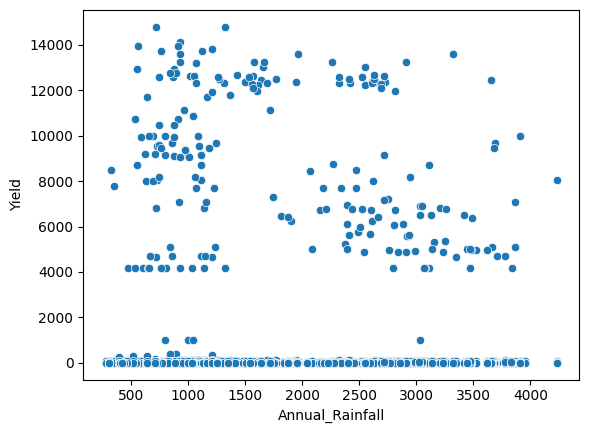

In [65]:
sns.scatterplot(x= yield_df.Annual_Rainfall, y= yield_df.Yield)
plt.show()